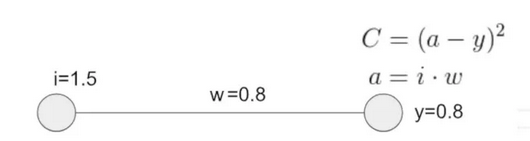

In [1]:
import numpy as np
from numpy.random import default_rng

In [2]:
def sigmoid(x):
  return 1 / 1 + np.exp(-x)

In [3]:
def se(y, y_pred):
  return (y - y_pred)**2

In [4]:
x_train = np.array([1.5])
y_train = np.array([.5])

In [87]:
class tinyNN:
  
  def __init__(self, inputs, outputs):
    self.inputs = inputs
    self.outputs = outputs
    self.lr = .01
    self.bias = 0

    rng = default_rng(1)

    self.weights = 2 * rng.random(inputs.shape[0]) - 1

  def forward(self, inputs, weights):
    # print("inputs = {}".format(inputs))
    # print("weights = {}".format(weights))
    return np.dot(inputs, weights) + self.bias

  def se(self, y, y_pred):
    return (y_pred - y)**2

  def se_deriv(self, y, y_pred):
    return y_pred - y
    
tiny = tinyNN(x_train, y_train)

In [89]:
for i in range(1000):

  outputs = tiny.forward(x_train, tiny.weights)

  actual_err = y_train - outputs

  error = tiny.se(y_train, outputs)

  deriv = tiny.se_deriv(y_train, outputs)

  adjustment = tiny.lr * (deriv)

  tiny.weights -= adjustment

# print("outputs = {}".format(outputs))

# print("y_train = {}".format(y_train))

# print("error = {}".format(actual_err))

# print("se = {}".format(error))

# print("deriv = {}".format(deriv))

# print("adj = {}".format(adjustment))

print(tiny.weights)

print(tiny.forward(x_train, tiny.weights))



[0.33333331]
0.49999997201842805
